In [2]:
import glob
import json
import matplotlib.pyplot as plt
import numpy as np
import os
import scipy

from tensorflow.examples.tutorials.mnist import input_data
from tsne import bh_sne

from models import FullyConnectedDiscriminator, ConvDiscriminator, FullyConnectedVAE, ConvVAE

result_dir = 'aws-results'

results = [('Conv 2', os.path.join(result_dir, 'Conv2Discriminator/*')),
           ('Conv 5', os.path.join(result_dir, 'Conv5Discriminator/*')),
           ('Conv 8', os.path.join(result_dir, 'Conv8Discriminator/*')),
           ('FC 100 Relu', os.path.join(result_dir, 'FullyConnected100ReluDiscriminator/*')),
           ('FC 100 Sigmoid', os.path.join(result_dir, 'FullyConnected100SigmoidDiscriminator/*')),
           ('FC 10 Relu', os.path.join(result_dir, 'FullyConnected10ReluDiscriminator/*')),
           ('FC 10 Sigmoid', os.path.join(result_dir, 'FullyConnected10SigmoidDiscriminator/*')),
           ('FC 200 Relu', os.path.join(result_dir, 'FullyConnected200ReluDiscriminator/*')),
           ('FC 200 Sigmoid', os.path.join(result_dir, 'FullyConnected200SigmoidDiscriminator/*')),]

# seed = 0
batch_size = 5000

mnist = input_data.read_data_sets('data/', validation_size=batch_size)
images, labels = mnist.validation.next_batch(batch_size)
# bh_sne needs data as float64
images = np.asarray(images).astype('float64')

distance_matrices = []

for i, architecture in enumerate(results):
    name = architecture[0]
    architecture_results = architecture[1]
    for result in glob.glob(architecture_results):
        with open(os.path.join(result, 'config.json'), 'r') as config_file:
            config = json.load(config_file)
            print(config['result_dir'])
            # TODO: the result_dir in the config file should use a relative path
            config['result_dir'] = config['result_dir'].replace('/home/ubuntu/space-of-representations/results', result_dir)
        if config['vae']:
            if config['conv']:
                print('Loading a convolutional vae')
                model = ConvVAE(config)
            else:
                print('Loading a fully connected vae')
                model = FullyConnectedVAE(config)
        else:
            if config['conv']:
                print('Loading a convolutional discriminator')
                model = ConvDiscriminator(config)
            else:
                print('Loading a fully connected discriminator')
                model = FullyConnectedDiscriminator(config)
        sess = model.sess
        representation = sess.run(model.representation, {model.x: images})
        # bh_sne needs data as float64
        representation = np.asarray(representation).astype('float64')
        min_ = np.min(representation)
        max_ = np.max(representation)
        representation = (representation - min_) / (max_ - min_)

        '''
        sne_data = bh_sne(representation)
        sne_x = sne_data[:, 0]
        sne_y = sne_data[:, 1]
        plt.figure(figsize=(20, 15), dpi=100, facecolor='w', edgecolor='k')
        plt.scatter(sne_x, sne_y, c=labels, cmap=plt.cm.get_cmap('jet', 10))
        plt.colorbar(ticks=range(10))
        plt.title(item[0])
        plt.show()
        '''

        distance_matrices.append(scipy.spatial.distance.pdist(representation, metric='euclidean'))

Extracting data/train-images-idx3-ubyte.gz
Extracting data/train-labels-idx1-ubyte.gz
Extracting data/t10k-images-idx3-ubyte.gz
Extracting data/t10k-labels-idx1-ubyte.gz
/home/ubuntu/space-of-representations/results/Conv2Discriminator/2017-05-12-23-43-46
Loading a convolutional discriminator
Extracting data/train-images-idx3-ubyte.gz
Extracting data/train-labels-idx1-ubyte.gz
Extracting data/t10k-images-idx3-ubyte.gz
Extracting data/t10k-labels-idx1-ubyte.gz
Loading the model from folder: aws-results/Conv2Discriminator/2017-05-12-23-43-46/checkpoints/
INFO:tensorflow:Restoring parameters from /home/psoulos/workspace/space-of-representations/aws-results/Conv2Discriminator/2017-05-12-23-43-46/checkpoints/checkpoint-50000
/home/ubuntu/space-of-representations/results/Conv2Discriminator/2017-05-12-23-58-48
Loading a convolutional discriminator
Extracting data/train-images-idx3-ubyte.gz
Extracting data/train-labels-idx1-ubyte.gz
Extracting data/t10k-images-idx3-ubyte.gz
Extracting data/t10k

Extracting data/t10k-labels-idx1-ubyte.gz
Loading the model from folder: aws-results/Conv8Discriminator/2017-05-13-00-33-33/checkpoints/
INFO:tensorflow:Restoring parameters from /home/psoulos/workspace/space-of-representations/aws-results/Conv8Discriminator/2017-05-13-00-33-33/checkpoints/checkpoint-50000
/home/ubuntu/space-of-representations/results/FullyConnected100ReluDiscriminator/2017-05-12-22-51-38
Loading a fully connected discriminator
Extracting data/train-images-idx3-ubyte.gz
Extracting data/train-labels-idx1-ubyte.gz
Extracting data/t10k-images-idx3-ubyte.gz
Extracting data/t10k-labels-idx1-ubyte.gz
Loading the model from folder: aws-results/FullyConnected100ReluDiscriminator/2017-05-12-22-51-38/checkpoints/
INFO:tensorflow:Restoring parameters from /home/psoulos/workspace/space-of-representations/aws-results/FullyConnected100ReluDiscriminator/2017-05-12-22-51-38/checkpoints/checkpoint-50000
/home/ubuntu/space-of-representations/results/FullyConnected100ReluDiscriminator/20

/home/ubuntu/space-of-representations/results/FullyConnected10ReluDiscriminator/2017-05-12-22-45-22
Loading a fully connected discriminator
Extracting data/train-images-idx3-ubyte.gz
Extracting data/train-labels-idx1-ubyte.gz
Extracting data/t10k-images-idx3-ubyte.gz
Extracting data/t10k-labels-idx1-ubyte.gz
Loading the model from folder: aws-results/FullyConnected10ReluDiscriminator/2017-05-12-22-45-22/checkpoints/
INFO:tensorflow:Restoring parameters from /home/psoulos/workspace/space-of-representations/aws-results/FullyConnected10ReluDiscriminator/2017-05-12-22-45-22/checkpoints/checkpoint-50000
/home/ubuntu/space-of-representations/results/FullyConnected10ReluDiscriminator/2017-05-12-22-41-19
Loading a fully connected discriminator
Extracting data/train-images-idx3-ubyte.gz
Extracting data/train-labels-idx1-ubyte.gz
Extracting data/t10k-images-idx3-ubyte.gz
Extracting data/t10k-labels-idx1-ubyte.gz
Loading the model from folder: aws-results/FullyConnected10ReluDiscriminator/2017-05

Extracting data/t10k-labels-idx1-ubyte.gz
Loading the model from folder: aws-results/FullyConnected200SigmoidDiscriminator/2017-05-12-23-39-18/checkpoints/
INFO:tensorflow:Restoring parameters from /home/psoulos/workspace/space-of-representations/aws-results/FullyConnected200SigmoidDiscriminator/2017-05-12-23-39-18/checkpoints/checkpoint-50000
/home/ubuntu/space-of-representations/results/FullyConnected200SigmoidDiscriminator/2017-05-12-23-34-53
Loading a fully connected discriminator
Extracting data/train-images-idx3-ubyte.gz
Extracting data/train-labels-idx1-ubyte.gz
Extracting data/t10k-images-idx3-ubyte.gz
Extracting data/t10k-labels-idx1-ubyte.gz
Loading the model from folder: aws-results/FullyConnected200SigmoidDiscriminator/2017-05-12-23-34-53/checkpoints/
INFO:tensorflow:Restoring parameters from /home/psoulos/workspace/space-of-representations/aws-results/FullyConnected200SigmoidDiscriminator/2017-05-12-23-34-53/checkpoints/checkpoint-50000
/home/ubuntu/space-of-representation

In [11]:
distance_matrices = np.matrix(distance_matrices)
print('Distance matrices shape: {}'.format(distance_matrices.shape))
# bh_sne needs data as float64
distance_matrices = np.asarray(distance_matrices).astype('float64')
meta_sne = bh_sne(distance_matrices, perplexity=6)

Distance matrices shape: (45, 12497500)


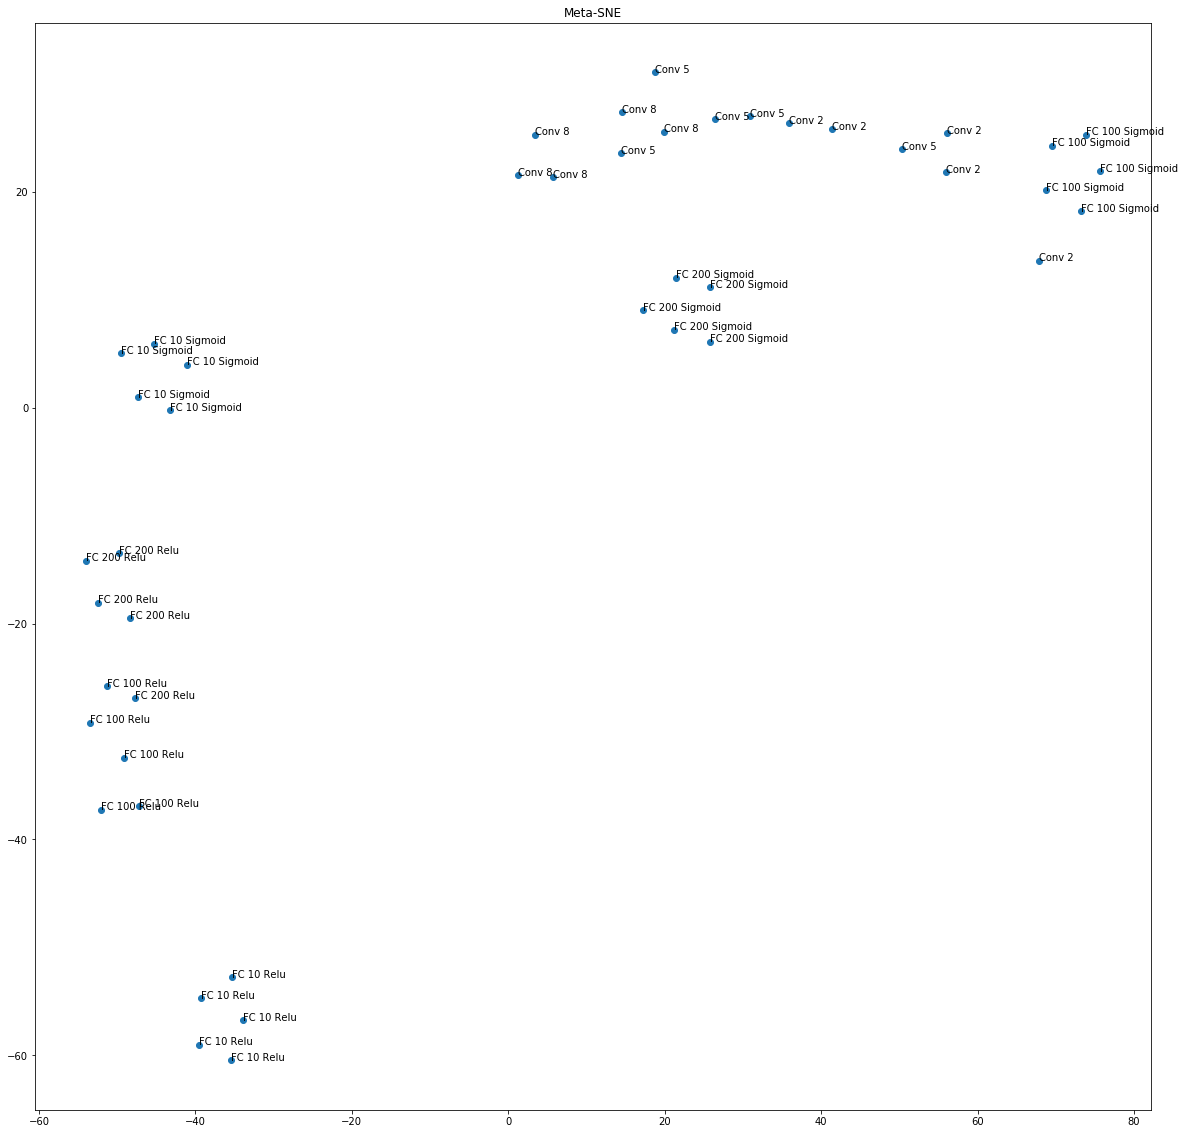

In [12]:
sne_x = meta_sne[:, 0]
sne_y = meta_sne[:, 1]


fig, ax = plt.subplots(figsize=(20,20))
ax.scatter(sne_x, sne_y)
names = []
for x in results:
    for i in range(5):
        names.append(x[0])
for i, name in enumerate(names):
    ax.annotate(name, (sne_x[i], sne_y[i]))
plt.title('Meta-SNE')
plt.show()

#plt.figure(figsize=(5, 5), dpi=100, facecolor='w', edgecolor='k')
#plt#, c=labels, cmap=plt.cm.get_cmap('jet', 10))
#plt.colorbar(ticks=range(10))
#plt.title('Meta-SNE')
#plt.show()



